In [1]:
# First fixed point


One Fixed Point:
  Intersection 1: V = -56.91 mV, W = 0.02


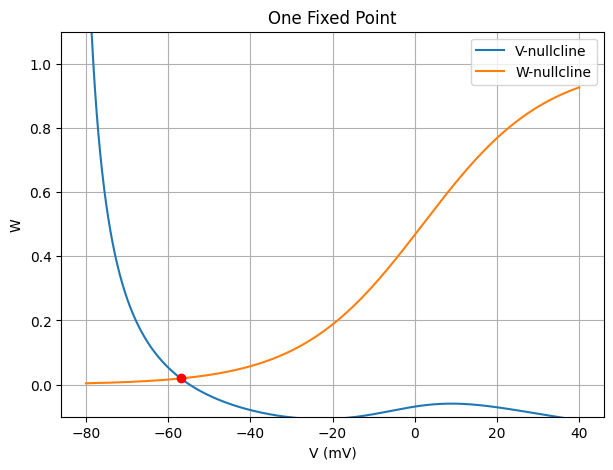

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Morris-Lecar model parameters
V1, V2, V3, V4 = -1.2, 18, 2, 30
gK, VK, VL, gL = 8, -84, -60, 2
C, phi = 20, 0.04

# Function to calculate nullclines
def nullclines(V, gCa, VCa, Iext):
    v_nullcline = (Iext - gL*(V-VL) - gCa*0.5*(1+np.tanh((V-V1)/V2))*(V-VCa)) / (gK*(V-VK))
    w_nullcline = 0.5 * (1 + np.tanh((V-V3)/V4))
    return v_nullcline, w_nullcline

# Function to find intersection points
def find_intersections(V, v_null, w_null):
    diff = v_null - w_null
    sign_changes = np.where(np.diff(np.sign(diff)))[0]
    intersections = []
    for i in sign_changes:
        v_intersect = V[i] + (V[i+1] - V[i]) * (0 - diff[i]) / (diff[i+1] - diff[i])
        w_intersect = 0.5 * (1 + np.tanh((v_intersect-V3)/V4))
        intersections.append((v_intersect, w_intersect))
    return intersections

# Create voltage array
V = np.linspace(-80, 40, 10000)  # Increased resolution for better intersection detection

# Scenario: One Fixed Point
gCa, VCa, Iext, title = 1.0, 120, 10, "One Fixed Point"

plt.figure(figsize=(7, 5))
v_null, w_null = nullclines(V, gCa, VCa, Iext)
plt.plot(V, v_null, label='V-nullcline')
plt.plot(V, w_null, label='W-nullcline')

intersections = find_intersections(V, v_null, w_null)
for v, w in intersections:
    plt.plot(v, w, 'ro')  # Plot intersection points

plt.title(title)
plt.xlabel('V (mV)')
plt.ylabel('W')
plt.legend()
plt.ylim(-0.1, 1.1)

# Print intersection points for this scenario
print(f"\n{title}:")
for i, (v, w) in enumerate(intersections, 1):
    print(f"  Intersection {i}: V = {v:.2f} mV, W = {w:.2f}")

plt.grid(True)
plt.show()


In [ ]:
#Three fixed point


Three Fixed Points:
  Intersection 1: V = -37.44 mV, W = 0.07
  Intersection 2: V = -13.42 mV, W = 0.26
  Intersection 3: V = 13.12 mV, W = 0.68


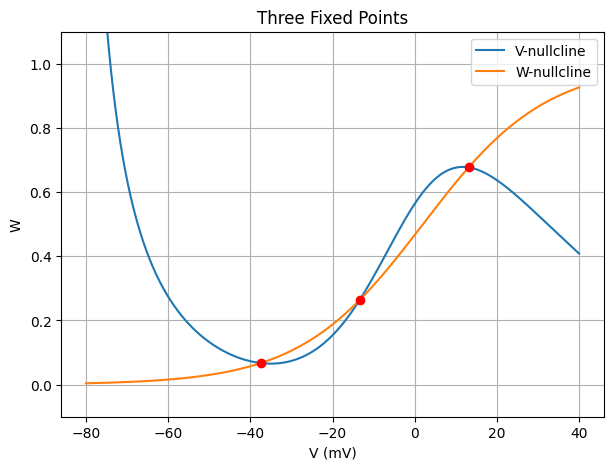

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Morris-Lecar model parameters
V1, V2, V3, V4 = -1.2, 18, 2, 30
gK, VK, VL, gL = 8, -84, -60, 2
C, phi = 20, 0.04

# Function to calculate nullclines
def nullclines(V, gCa, VCa, Iext):
    v_nullcline = (Iext - gL*(V-VL) - gCa*0.5*(1+np.tanh((V-V1)/V2))*(V-VCa)) / (gK*(V-VK))
    w_nullcline = 0.5 * (1 + np.tanh((V-V3)/V4))
    return v_nullcline, w_nullcline

# Function to find intersection points
def find_intersections(V, v_null, w_null):
    diff = v_null - w_null
    sign_changes = np.where(np.diff(np.sign(diff)))[0]
    intersections = []
    for i in sign_changes:
        v_intersect = V[i] + (V[i+1] - V[i]) * (0 - diff[i]) / (diff[i+1] - diff[i])
        w_intersect = 0.5 * (1 + np.tanh((v_intersect-V3)/V4))
        intersections.append((v_intersect, w_intersect))
    return intersections

# Create voltage array
V = np.linspace(-80, 40, 10000)  # Increased resolution for better intersection detection

# Scenario: Three Fixed Points
gCa, VCa, Iext, title = 7.0, 120, 50.86, "Three Fixed Points"

plt.figure(figsize=(7, 5))
v_null, w_null = nullclines(V, gCa, VCa, Iext)
plt.plot(V, v_null, label='V-nullcline')
plt.plot(V, w_null, label='W-nullcline')

intersections = find_intersections(V, v_null, w_null)
for v, w in intersections:
    plt.plot(v, w, 'ro')  # Plot intersection points

plt.title(title)
plt.xlabel('V (mV)')
plt.ylabel('W')
plt.legend()
plt.ylim(-0.1, 1.1)

# Print intersection points for this scenario
print(f"\n{title}:")
for i, (v, w) in enumerate(intersections, 1):
    print(f"  Intersection {i}: V = {v:.2f} mV, W = {w:.2f}")

plt.grid(True)
plt.show()
